In [2]:
! pip install kaggle

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d amerzishminha/forest-fire-smoke-and-non-fire-image-dataset


Dataset URL: https://www.kaggle.com/datasets/amerzishminha/forest-fire-smoke-and-non-fire-image-dataset
License(s): CC0-1.0
... resuming from 22020096 bytes (6877540729 bytes left) ...
100% 6.42G/6.43G [05:21<00:00, 22.7MB/s]
100% 6.43G/6.43G [05:21<00:00, 21.4MB/s]


In [7]:
from zipfile import ZipFile
datasets = '/content/forest-fire-smoke-and-non-fire-image-dataset.zip'

with ZipFile(datasets, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [11]:

import tensorflow as tf
import numpy as np

from keras.preprocessing.image import ImageDataGenerator

In [12]:
training_data_gen = ImageDataGenerator(
rescale= 1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True
)

In [13]:
training_set = training_data_gen. flow_from_directory( '/content/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/train',
target_size=(64,64),
batch_size=32,
class_mode='categorical'
)


Found 32398 images belonging to 3 classes.


In [14]:
testing_datagen = ImageDataGenerator (rescale=1./255, horizontal_flip=True)
testing_set = testing_datagen.flow_from_directory(
'/content/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test',
target_size=(64,64),
batch_size=32,
class_mode='categorical'
)

Found 10500 images belonging to 3 classes.


In [15]:
print(training_set[0][1])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [16]:
training_set[0]

(array([[[[0.09855802, 0.06143242, 0.08800478],
          [0.09897404, 0.07419314, 0.11434451],
          [0.08622336, 0.06480583, 0.11236257],
          ...,
          [0.08666182, 0.04185869, 0.07766528],
          [0.12250379, 0.06951151, 0.11044437],
          [0.14839052, 0.09497229, 0.14012642]],
 
         [[0.11069957, 0.0979297 , 0.11710004],
          [0.08944506, 0.08278829, 0.11876047],
          [0.04111588, 0.02845018, 0.07162811],
          ...,
          [0.13411754, 0.06609608, 0.10065322],
          [0.09095021, 0.04462256, 0.08989531],
          [0.05765681, 0.02653402, 0.07954482]],
 
         [[0.07444181, 0.06411841, 0.08302461],
          [0.03978411, 0.02522951, 0.05663507],
          [0.04371602, 0.02431859, 0.062919  ],
          ...,
          [0.17129564, 0.09350949, 0.12443701],
          [0.06176971, 0.03390922, 0.083063  ],
          [0.0716323 , 0.03894828, 0.09529213]],
 
         ...,
 
         [[0.08700066, 0.07383261, 0.06750311],
          [0.05127

In [17]:
testing_set[0]

(array([[[[0.03921569, 0.0509804 , 0.05490196],
          [0.05490196, 0.05490196, 0.04705883],
          [0.02352941, 0.03137255, 0.03137255],
          ...,
          [0.18823531, 0.14509805, 0.12156864],
          [0.1764706 , 0.14117648, 0.11764707],
          [0.18823531, 0.14901961, 0.12941177]],
 
         [[0.04313726, 0.05490196, 0.05882353],
          [0.05882353, 0.05882353, 0.05490196],
          [0.04313726, 0.04705883, 0.04313726],
          ...,
          [0.16862746, 0.13725491, 0.11764707],
          [0.1764706 , 0.14117648, 0.12156864],
          [0.1764706 , 0.14509805, 0.1254902 ]],
 
         [[0.04705883, 0.05490196, 0.05490196],
          [0.05490196, 0.0627451 , 0.0627451 ],
          [0.03137255, 0.04313726, 0.04313726],
          ...,
          [0.18431373, 0.14509805, 0.12156864],
          [0.18431373, 0.14901961, 0.1254902 ],
          [0.18039216, 0.14509805, 0.12156864]],
 
         ...,
 
         [[0.17254902, 0.14509805, 0.1254902 ],
          [0.19215

In [18]:
cnn = tf.keras.models. Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation= 'relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation= 'relu'))
cnn.add(tf.keras.layers.MaxPool2D (pool_size=3, strides= 2))
cnn.add(tf.keras.layers.Conv2D (filters=16, kernel_size=3, activation= 'relu'))
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=3, strides= 2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=100, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=100, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [19]:
cnn.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [20]:
cnn.fit(x = training_set, validation_data = testing_set, epochs=25)

Epoch 1/25
1013/1013 [==============================] - 364s 353ms/step - loss: 0.3212 - accuracy: 0.8813 - val_loss: 0.3504 - val_accuracy: 0.8694
Epoch 2/25
1013/1013 [==============================] - 355s 350ms/step - loss: 0.2231 - accuracy: 0.9227 - val_loss: 0.2790 - val_accuracy: 0.8866
Epoch 3/25
1013/1013 [==============================] - 343s 339ms/step - loss: 0.1854 - accuracy: 0.9381 - val_loss: 0.2772 - val_accuracy: 0.9020
Epoch 4/25
1013/1013 [==============================] - 344s 340ms/step - loss: 0.1654 - accuracy: 0.9460 - val_loss: 0.1832 - val_accuracy: 0.9380
Epoch 5/25
1013/1013 [==============================] - 341s 336ms/step - loss: 0.1519 - accuracy: 0.9489 - val_loss: 0.2396 - val_accuracy: 0.9110
Epoch 6/25
1013/1013 [==============================] - 341s 337ms/step - loss: 0.1407 - accuracy: 0.9540 - val_loss: 0.2102 - val_accuracy: 0.9247
Epoch 7/25
1013/1013 [==============================] - 332s 328ms/step - loss: 0.1294 - accuracy: 0.9557 - val_

In [21]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 29, 29, 16)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 16)        2320      
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 16)        0         
 g2D)                                                   

In [22]:
scores= cnn.evaluate(training_set)
print(scores[1]*100)

1013/1013 [==============================] - 293s 289ms/step - loss: 0.0563 - accuracy: 0.9809
98.08630347251892


In [23]:
scores= cnn.evaluate(testing_set)
print(scores[1]*100)

329/329 [==============================] - 83s 253ms/step - loss: 0.1461 - accuracy: 0.9551
95.51428556442261


In [24]:
testing_set_label=testing_set[0][1]
testing_set_sample=testing_set[0][0]

In [25]:
predictions=cnn.predict(testing_set_sample, batch_size=32, verbose=0)

In [26]:
predictions

array([[8.22934453e-05, 9.86862421e-01, 1.30551755e-02],
       [9.99999046e-01, 3.78501397e-12, 9.90455533e-07],
       [3.17561255e-11, 1.00000000e+00, 3.87792090e-11],
       [5.16114333e-08, 1.01842252e-05, 9.99989748e-01],
       [2.99975014e-04, 9.97205079e-01, 2.49494286e-03],
       [5.84486173e-03, 6.73206614e-07, 9.94154513e-01],
       [9.73886907e-01, 4.09902364e-04, 2.57031731e-02],
       [1.48674761e-08, 6.35468833e-09, 1.00000000e+00],
       [5.63866775e-09, 1.76652328e-08, 1.00000000e+00],
       [2.39046130e-07, 3.22168626e-06, 9.99996543e-01],
       [5.80689584e-06, 4.09012198e-01, 5.90981960e-01],
       [1.14534334e-04, 3.93561677e-05, 9.99846101e-01],
       [1.84989840e-05, 6.75846877e-07, 9.99980807e-01],
       [4.32675188e-05, 2.84591642e-05, 9.99928236e-01],
       [1.41767259e-06, 7.00552647e-08, 9.99998569e-01],
       [4.70502349e-03, 9.82439160e-01, 1.28557608e-02],
       [3.41697337e-09, 1.00000000e+00, 3.11623367e-08],
       [1.00000000e+00, 2.73907

In [27]:
rounded_predictions=[]
for arr in predictions:
 if arr[0]>arr[1] and arr[0]>arr[2]:
   rounded_predictions.append([1,0,0])
 elif arr[1]>arr[0] and arr[1]>arr[2]:
  rounded_predictions.append([0,1,0])
 else:
  rounded_predictions.append([0,0,1])

rounded_predictions

[[0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1]]

In [28]:
rounded_predictions=np.array(rounded_predictions)

In [29]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [30]:


cm=confusion_matrix(testing_set_label.argmax (axis=1), rounded_predictions.argmax (axis=1))

Text(0.5, 0, 'Predicted label')

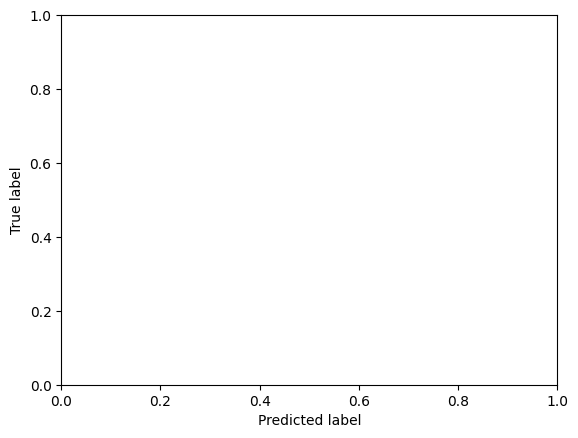

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm=cm.astype('float') / cm. sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product (range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 9  0  1]
 [ 0  9  0]
 [ 0  0 13]]


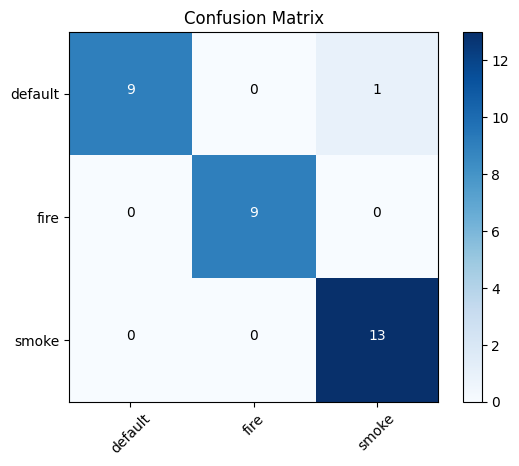

In [32]:
cm_plot_labels=['default', 'fire', 'smoke']
plot_confusion_matrix (cm, cm_plot_labels, title="Confusion Matrix")

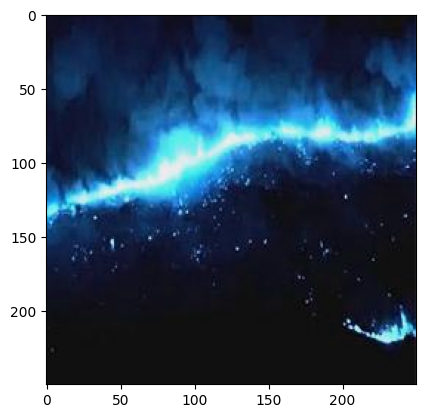

1/1 [==============================] - 0s 35ms/step
[[0. 1. 0.]]
Fire Detected!


In [37]:
import numpy as np
from keras.preprocessing import image
from PIL import Image
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
im = cv2.imread('/content/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test/fire/Fire (1009).jpg', cv2.IMREAD_UNCHANGED)
plt.imshow(im)
plt.show()
test_image = image.load_img('/content/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test/fire/Fire (1009).jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims (test_image, axis= 0)
result = cnn.predict(test_image)
print(result)
if result[0][0] == 1:
  print("Nothing Detected!")
elif result[0][1] == 1:
  print("Fire Detected!")
elif result[0][2] == 1:
  print("Smoke Detected")

Populating the interactive namespace from numpy and matplotlib


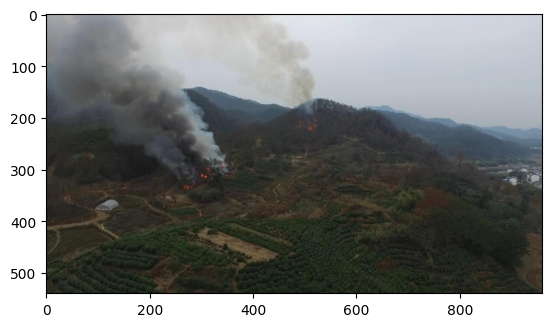

1/1 [==============================] - 0s 18ms/step
[[0. 0. 1.]]
Smoke Detected


In [40]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test/Smoke/Smoke (110).jpg',cv2.IMREAD_UNCHANGED)
imgplot = plt.imshow(img)
plt.show()
test_image = image.load_img('/content/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test/Smoke/Smoke (110).jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims (test_image, axis = 0)
result = cnn.predict(test_image)
print(result)
if result[0][0] == 1:
  print("Nothing Detected!")
elif result[0][1] == 1:
  print("Fire Detected!")
elif result[0][2] == 1:
   print("Smoke Detected")

In [ ]:
import numpy as np
from keras.preprocessing import image
from PIL import Image
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
im = cv2.imread('/content/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test/non fire/NON_FIRE (179).jpg', cv2. IMREAD_UNCHANGED)
plt.imshow(im)
plt.show()
test_image = image.load_img('/content/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test/non fire/NON_FIRE (179).jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims (test_image, axis = 0)
result = cnn.predict(test_image)
print(result)
if result[0][0] == 1:
  print("Nothing Detected!")
elif result[0][1] == 1:
  print("Fire Detected!")
elif result[0][2] == 1:
   print("Smoke Detected")

In [47]:
cnn.save('fire_smoke_detection_model.h5')

In [48]:
from keras.models import load_model
new_model = load_model('fire_smoke_detection_model.h5')